# Goodreads Book Ratings - Initial Data Exploration

#### Import Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Import Data

In [4]:
ratings = pd.read_csv('../ratings.csv')

In [4]:
ratings.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [5]:
n_ratings = len(ratings)
print('Number of ratings: {}'.format(n_ratings))

Number of ratings: 5976479


#### How many different users are there, and how many ratings have they given?

In [6]:
n_users = len(ratings.user_id.unique())
print('Number of unique users: {}'.format(n_users))

Number of unique users: 53424


In [7]:
user_freq = ratings.user_id.value_counts() # number of ratings for each user_id
user_freq.head()

30944    200
12874    200
52036    199
28158    199
12381    199
Name: user_id, dtype: int64

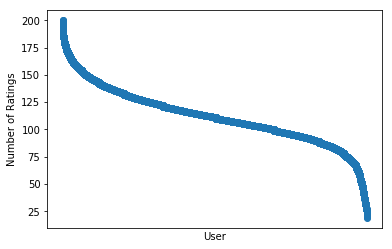

In [20]:
plt.scatter(range(len(user_freq)), user_freq)
plt.xlabel('User')
plt.ylabel('Number of Ratings')
plt.xticks([])
plt.show()

#### How many different items are there, and how many ratings do they have?

In [10]:
n_products = len(ratings.book_id.unique())
print('Number of unique items: {}'.format(n_products))

Number of unique items: 10000


In [12]:
product_freq = ratings.book_id.value_counts()
product_freq.head()

1    22806
2    21850
4    19088
3    16931
5    16604
Name: book_id, dtype: int64

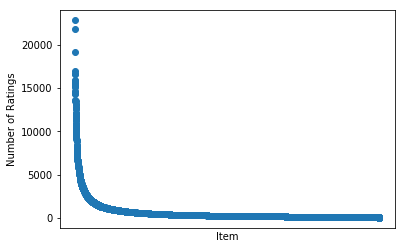

In [22]:
plt.scatter(range(len(product_freq)), product_freq)
plt.xlabel('Item')
plt.ylabel('Number of Ratings')
plt.xticks([])
plt.show()

#### How sparse is the data?

In [14]:
sparsity = (n_ratings / (n_users * n_products)) * 100
print('Sparsity of ratings data: {0:.6f}%'.format(sparsity))

Sparsity of ratings data: 1.118688%


In [9]:
# Function to pick a new dataset with the X most prolific reviewers and Y most reviewed books
def pick_users_books(df, num_users, num_books):
    user_counts = pd.DataFrame(df.user_id.value_counts()).sort_values('user_id', ascending=False)
    top_10K_users = list(user_counts[0:num_users].index)
    user_filtered_df = df[df.user_id.isin(top_10K_users)]
    filtered_book_counts = pd.DataFrame(user_filtered_df.book_id.value_counts()).sort_values('book_id', ascending = False)
    top_100_filtered_books = list(filtered_book_counts[0:num_books].index)
    filtered_df = user_filtered_df[user_filtered_df.book_id.isin(top_100_filtered_books)]
    print("New dataframe has {} users, {} items, and a sparsity of {}".format(len(filtered_df.user_id.unique()),len(filtered_df.book_id.unique()),len(filtered_df)/(len(filtered_df.user_id.unique())*len(filtered_df.book_id.unique()))))
    return filtered_df

In [10]:
filtered_10Kusers_100books = pick_users_books(ratings, 10000, 100)

New dataframe has 9980 users, 100 items, and a sparsity of 0.2719659318637275
